### Binary Classification Dataset

In [1]:
import pandas as pd

train = pd.read_csv("a4a.txt",delimiter=" ",header = None)
test = pd.read_csv("a4at.txt",delimiter=" ",header = None)

**Attributes bar graph**

<AxesSubplot:ylabel='Frequency'>

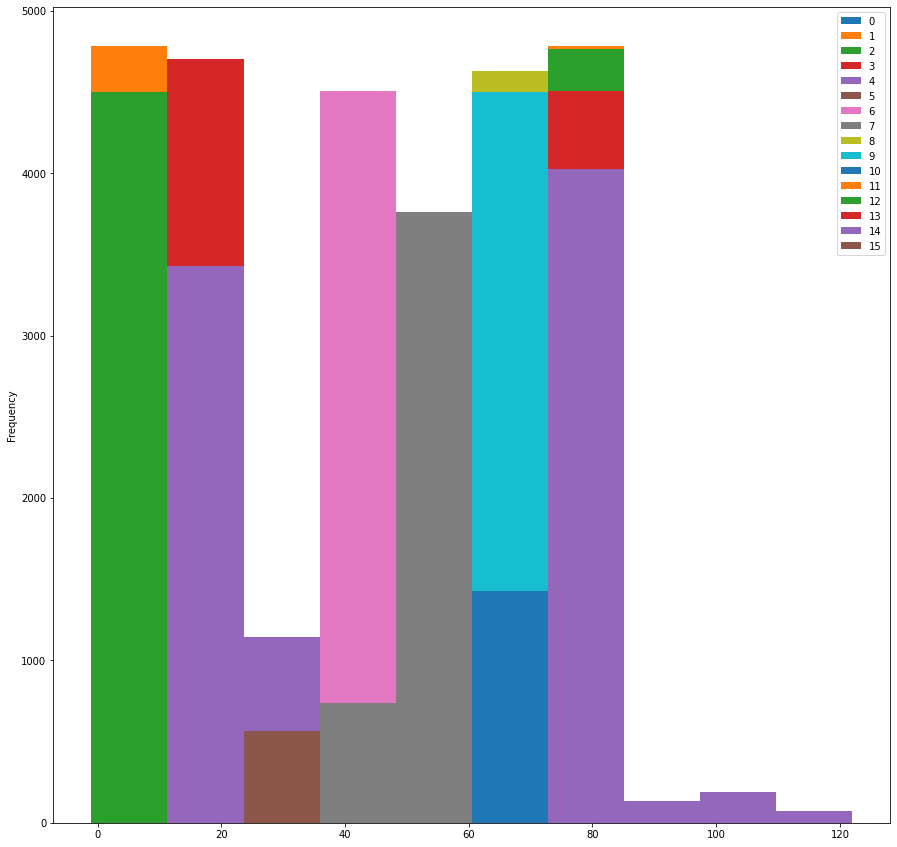

In [2]:
import matplotlib.pyplot as plt
train.plot(kind = 'hist',figsize = (15,15))

**Splitting the train and test data**

In [3]:
X_train = train.iloc[:,1:15].values
y_train = train.iloc[:,0].values
X_test = test.iloc[:,1:15].values
y_test = test.iloc[:,0].values

**Euclidean distance**

In [4]:
import numpy as np
import operator

def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

**KNN Model**

In [29]:
class KNearestNeighbors():
    
    def __init__(self, K=3):
        self.K = K
    
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
        
    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations in the test set
        for i in range(len(X_test)):            
            
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            
            # sort the distances and return the indices of K neighbors
            dist_sorted = dist.argsort()[:self.K]
            
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            
            # append the class label to the list
            predictions.append(sorted_neigh_count[0][0])
        return predictions

**Accuracy and Loss calculator**

In [6]:
def calculate_accuracy(y_true,y_pred):
    hit = 0
    miss = 0
    for n,i in enumerate(y_true):
        if i == y_pred[n]:
            hit += 1
        else:
            miss += 1
    score = hit/len(y_true)
    loss = miss/len(y_true)
    return score , loss

### Binary Classification using the KNN Model
**Applying over a single instance**

In [7]:
model = KNearestNeighbors()
model.fit(X_train,y_train)
y_pred = model.predict([X_test[300]])
print("Actual value",y_test[300])
print("Predicted value:",y_pred)

Actual value -1
Predicted value: [-1]


**Taking 1000 records from the test data for testing and over K value of 1..5**

In [11]:
k_value = []
accuracy = []
losses = []
for k in range(1,6):
    model = KNearestNeighbors(K = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test[:1000])
    acc,loss = calculate_accuracy(y_test[:1000],y_pred)
    print("K value:",k)
    print("Accuracy: ", round(acc,2))
    print("Loss: ", round(loss,2))
    k_value.append(k)
    accuracy.append(acc)
    losses.append(loss)

K value: 1
Accuracy:  0.77
Loss:  0.23
K value: 2
Accuracy:  0.77
Loss:  0.23
K value: 3
Accuracy:  0.8
Loss:  0.2
K value: 4
Accuracy:  0.8
Loss:  0.2
K value: 5
Accuracy:  0.81
Loss:  0.19


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='K-NN', ylabel='Cross Validation Score'>

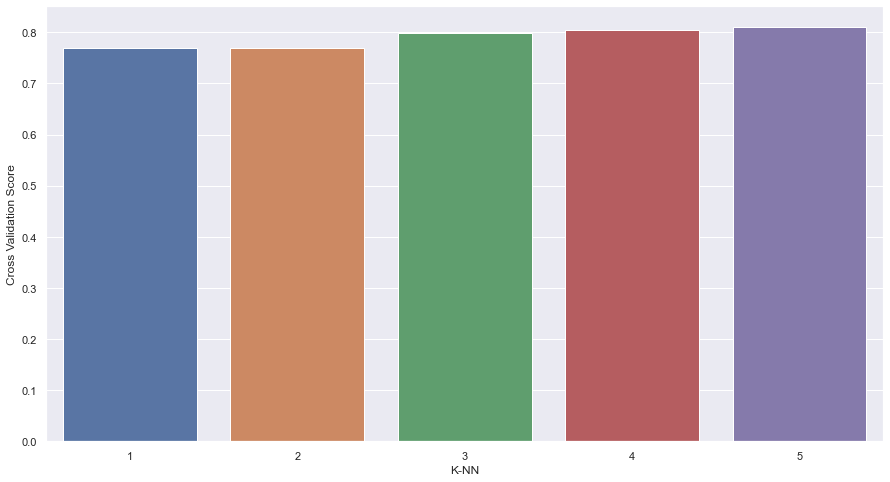

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("K-NN")
plt.ylabel("Cross Validation Score")

sns.barplot(k_value,accuracy)

### Multi-Classification using KNN Model

**Loading the iris dataset for multi classification**

In [16]:
import pandas as pd

df = pd.read_csv("iris.txt",delimiter=" ",header = None)

**Function to random shuffle the data**

In [19]:
def shuffle_split_data(X, y, split = 0.7):
    split = np.random.rand(X.shape[0]) < split

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]
    
    return X_train,y_train,X_test,y_test

**Splitting the input and output column into label and features**

In [20]:
X = df.iloc[:,1:5].values 
y = df.iloc[:,0].values

**Train and test splition**

In [21]:
X_train,y_train,X_test,y_test = shuffle_split_data(X, y)

**Checking the model over a single instance**

In [22]:
model = KNearestNeighbors()
model.fit(X_train,y_train)
y_pred = model.predict([X_test[40]])
print("Actual value",y_test[40])
print("Predicted value:",y_pred)

Actual value 3
Predicted value: [3]


**Taking 1000 records from the test data for testing and over K value of 1..5**

In [23]:
k_value = []
accuracy = []
losses = []
for k in range(1,6):
    model = KNearestNeighbors(K = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test[:1000])
    acc,loss = calculate_accuracy(y_test[:1000],y_pred)
    print("K value:",k)
    print("Accuracy: ", round(acc,2))
    print("Loss: ", round(loss,2))
    k_value.append(k)
    accuracy.append(acc)
    losses.append(loss)

K value: 1
Accuracy:  0.92
Loss:  0.08
K value: 2
Accuracy:  0.92
Loss:  0.08
K value: 3
Accuracy:  0.92
Loss:  0.08
K value: 4
Accuracy:  0.94
Loss:  0.06
K value: 5
Accuracy:  0.94
Loss:  0.06


**Displaying the best results over k value**

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='K-NN', ylabel='Cross Validation Score'>

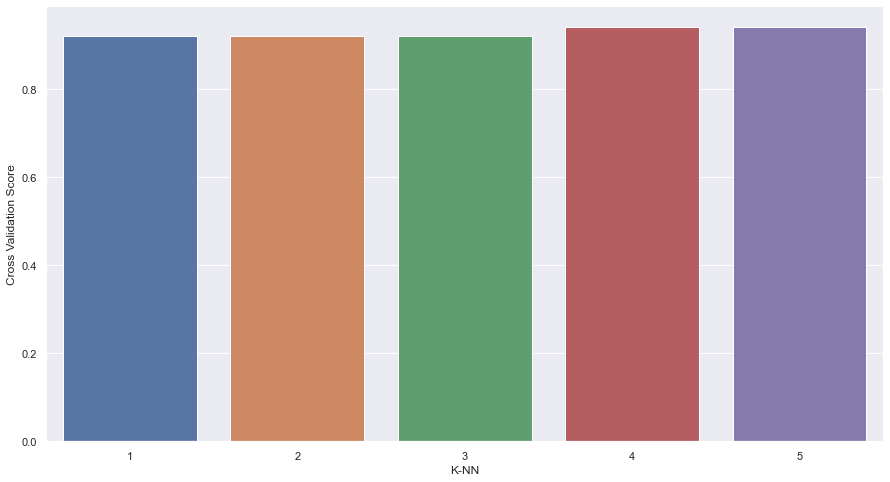

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("K-NN")
plt.ylabel("Cross Validation Score")

sns.barplot(k_value,accuracy)

### **Binary and Multi classification using another distance formula**

**Using the minkowski distance**

In [31]:
# calculating minkowski distance between vectors
from math import sqrt
 
# calculate minkowski distance
def minkowski_distance(a, b, p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

**The Class for the minkowski distance**

In [32]:
class KNearestNeighbors_MD():
    
    def __init__(self, K=3, p = 3):
        self.K = K
        self.p = p
        
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
        
        
    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations in the test set
        for i in range(len(X_test)):            
            
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([minkowski_distance(X_test[i], x_t,self.p) for x_t in self.X_train])
            
            # sort the distances and return the indices of K neighbors
            dist_sorted = dist.argsort()[:self.K]
            
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            
            # append the class label to the list
            predictions.append(sorted_neigh_count[0][0])
            
        return predictions

**For Binary Classification** 

In [35]:
import pandas as pd

train = pd.read_csv("a4a.txt",delimiter=" ",header = None)
test = pd.read_csv("a4at.txt",delimiter=" ",header = None)

X_train = train.iloc[:,1:15].values
y_train = train.iloc[:,0].values
X_test = test.iloc[:,1:15].values
y_test = test.iloc[:,0].values

**Calculating accuracy over the k value 1...5 and taking p = 3 as a default value and testing over first 1000 records of the test data** 

In [36]:
k_value = []
accuracy = []
losses = []
for k in range(1,6):
    model = KNearestNeighbors_MD(K = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test[:1000])
    acc,loss = calculate_accuracy(y_test[:1000],y_pred)
    print("K value:",k)
    print("Accuracy: ", round(acc,2))
    print("Loss: ", round(loss,2))
    k_value.append(k)
    accuracy.append(acc)
    losses.append(loss)

K value: 1
Accuracy:  0.78
Loss:  0.22
K value: 2
Accuracy:  0.78
Loss:  0.22
K value: 3
Accuracy:  0.8
Loss:  0.2
K value: 4
Accuracy:  0.81
Loss:  0.19
K value: 5
Accuracy:  0.81
Loss:  0.19


### **For Multi-Classification**

**Loading the Multi-class dataset**

In [37]:
import pandas as pd

df = pd.read_csv("iris.txt",delimiter=" ",header = None)

X = df.iloc[:,1:5].values 
y = df.iloc[:,0].values

X_train,y_train,X_test,y_test = shuffle_split_data(X, y)

**Calculating the accuracy over the first 1000 records of the test data**

In [38]:
k_value = []
accuracy = []
losses = []
for k in range(1,6):
    model = KNearestNeighbors_MD(K = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test[:1000])
    acc,loss = calculate_accuracy(y_test[:1000],y_pred)
    print("K value:",k)
    print("Accuracy: ", round(acc,2))
    print("Loss: ", round(loss,2))
    k_value.append(k)
    accuracy.append(acc)
    losses.append(loss)

K value: 1
Accuracy:  0.9
Loss:  0.1
K value: 2
Accuracy:  0.9
Loss:  0.1
K value: 3
Accuracy:  0.88
Loss:  0.12
K value: 4
Accuracy:  0.88
Loss:  0.12
K value: 5
Accuracy:  0.88
Loss:  0.12
